In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df =  pd.read_csv('diabetes.csv')

In [37]:
plt.style.use('ggplot')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
def numberOfZeroes(n):
    count = 0
    for item in n:
        if item == 0:
            count +=1
    return count

for item in df.columns:
    print("Number of 0 in " + item, numberOfZeroes(df[item]))

Number of 0 in Pregnancies 111
Number of 0 in Glucose 5
Number of 0 in BloodPressure 35
Number of 0 in SkinThickness 227
Number of 0 in Insulin 374
Number of 0 in BMI 11
Number of 0 in DiabetesPedigreeFunction 0
Number of 0 in Age 0
Number of 0 in Outcome 500


In [8]:
df1 = df

cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 
          'Age']
df1[cols] = df1[cols].replace(0, np.nan)

In [9]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.170589
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
Glucose                     0.494650
Outcome                     1.000000
Name: Outcome, dtype: float64

In [11]:
df1.corr()['Outcome'].sort_values()

BloodPressure               0.170589
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
Glucose                     0.494650
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

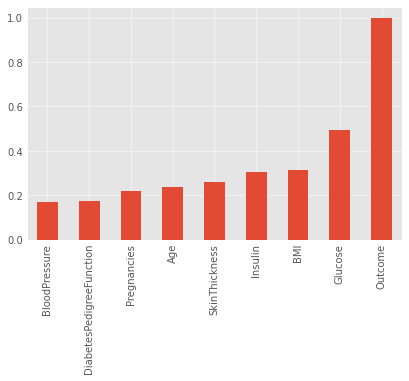

In [38]:
df.corr()['Outcome'].sort_values().plot(kind='bar')

## EDA

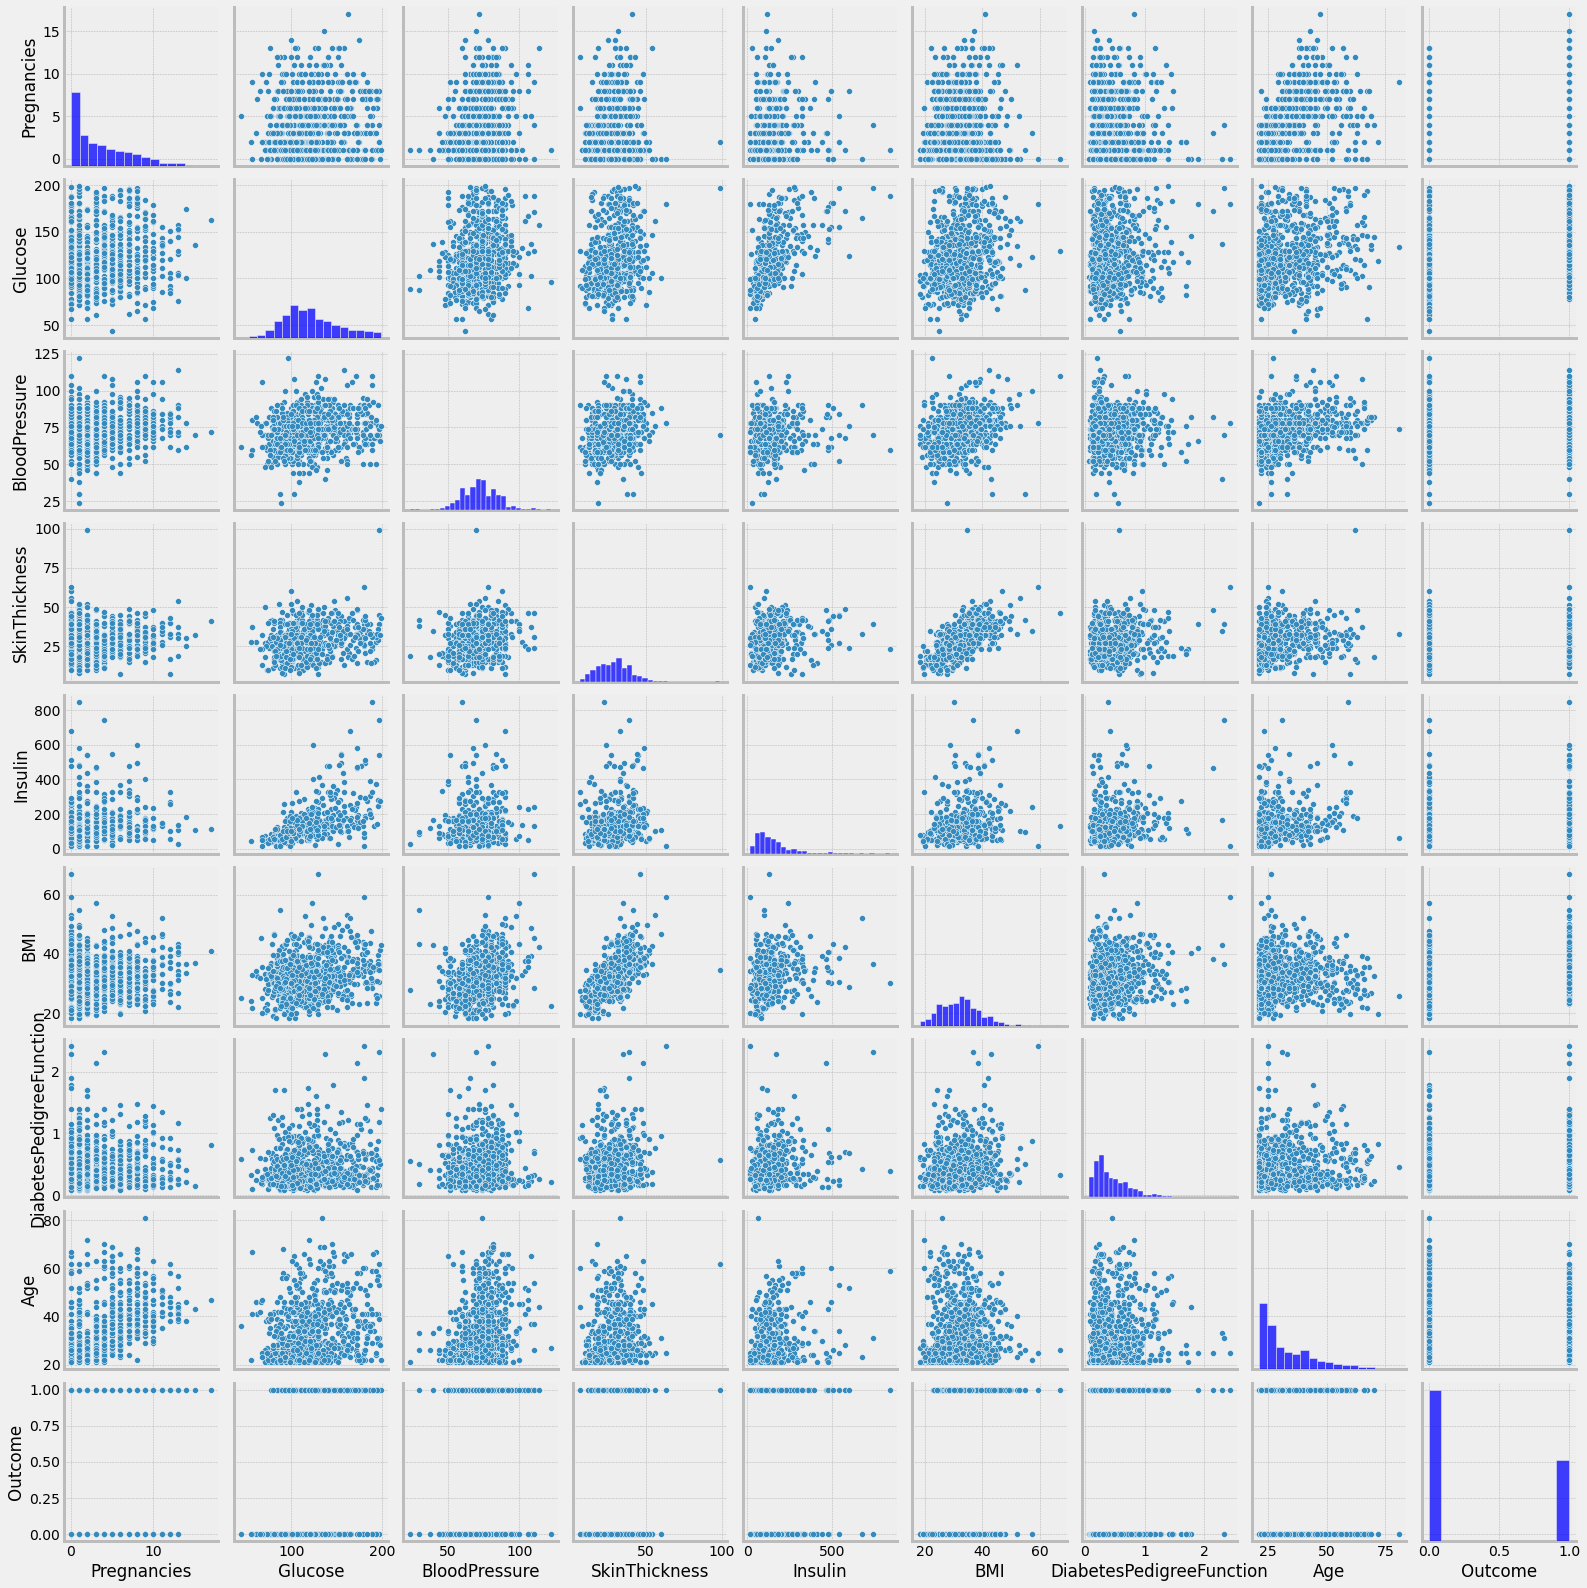

In [31]:
sns.pairplot(df)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

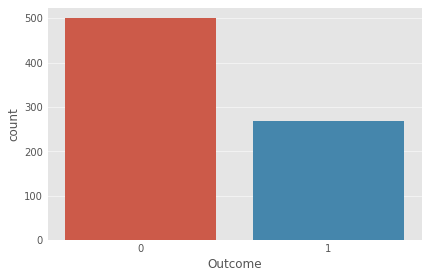

In [39]:
sns.countplot(x = 'Outcome',data = df)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

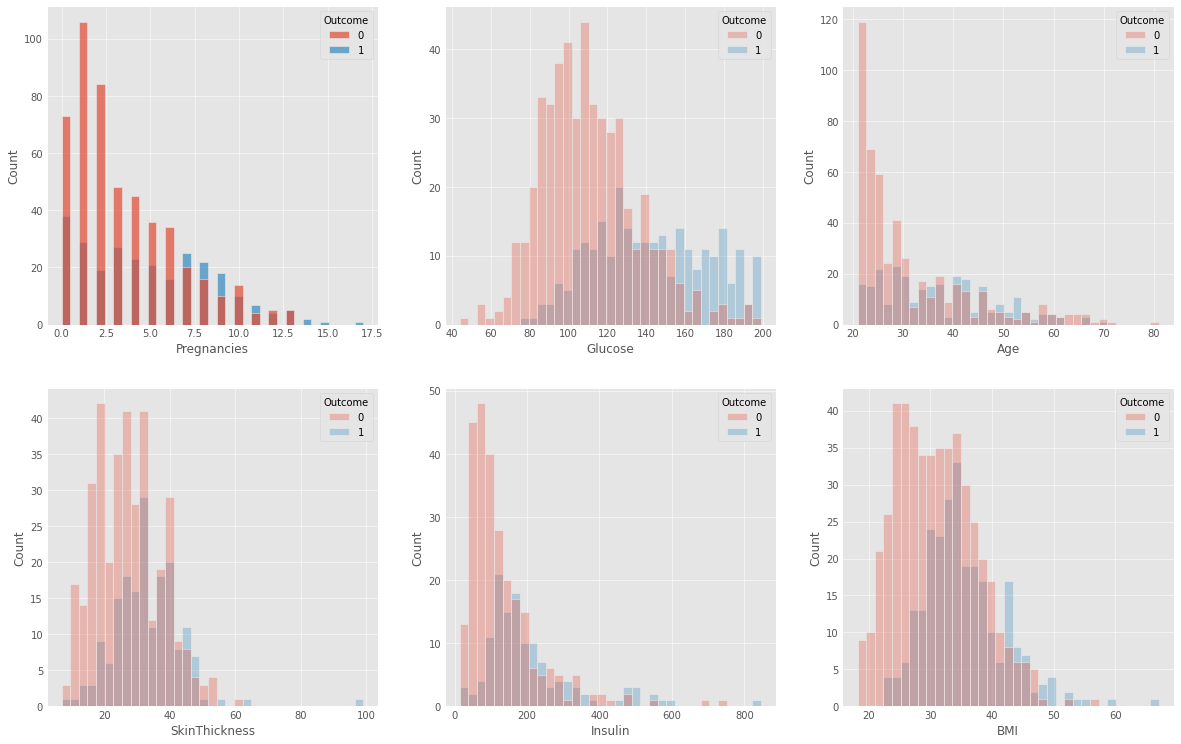

In [40]:
fig, axes = plt.subplots(2,3, figsize=(18,12))

sns.histplot(ax = axes[0,0], x='Pregnancies', data=df, hue='Outcome', alpha=0.7, bins=35)
sns.histplot(ax = axes[0,1], x='Glucose', data=df, hue='Outcome', alpha=0.3, bins=35)
sns.histplot(ax = axes[0,2], x='Age', data=df, hue='Outcome', alpha=0.3, bins=35)
sns.histplot(ax = axes[1,0], x='SkinThickness', data=df, hue='Outcome', alpha=0.3, bins=35)
sns.histplot(ax = axes[1,1], x='Insulin', data=df, hue='Outcome', alpha=0.3, bins=35)
sns.histplot(ax = axes[1,2], x='BMI', data=df, hue='Outcome', alpha=0.3, bins=35)

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Age'>

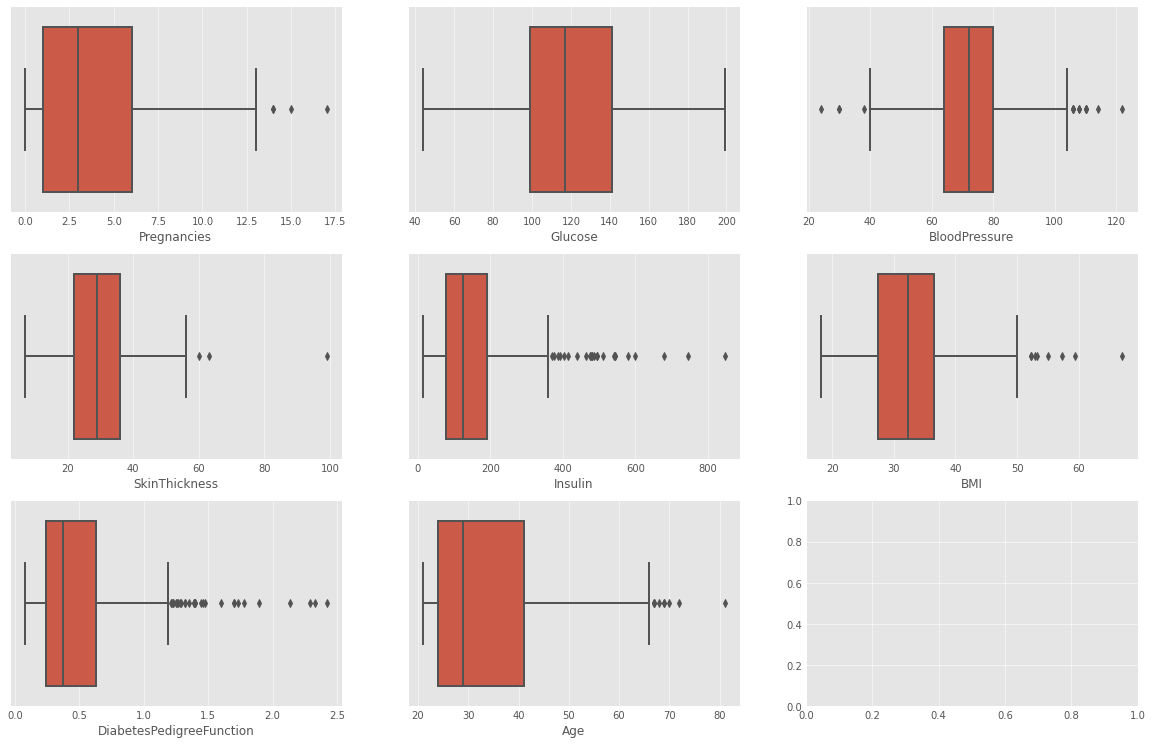

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(18,12))

sns.boxplot(ax = axes[0,0],x='Pregnancies', data=df)
sns.boxplot(ax = axes[0,1],x='Glucose', data=df)
sns.boxplot(ax = axes[0,2],x='BloodPressure', data=df)
sns.boxplot(ax = axes[1,0],x='SkinThickness', data=df)
sns.boxplot(ax = axes[1,1],x='Insulin', data=df)
sns.boxplot(ax = axes[1,2],x='BMI', data=df)
sns.boxplot(ax = axes[2,0],x='DiabetesPedigreeFunction', data=df)
sns.boxplot(ax = axes[2,1],x='Age', data=df)

## Removing Outliers

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

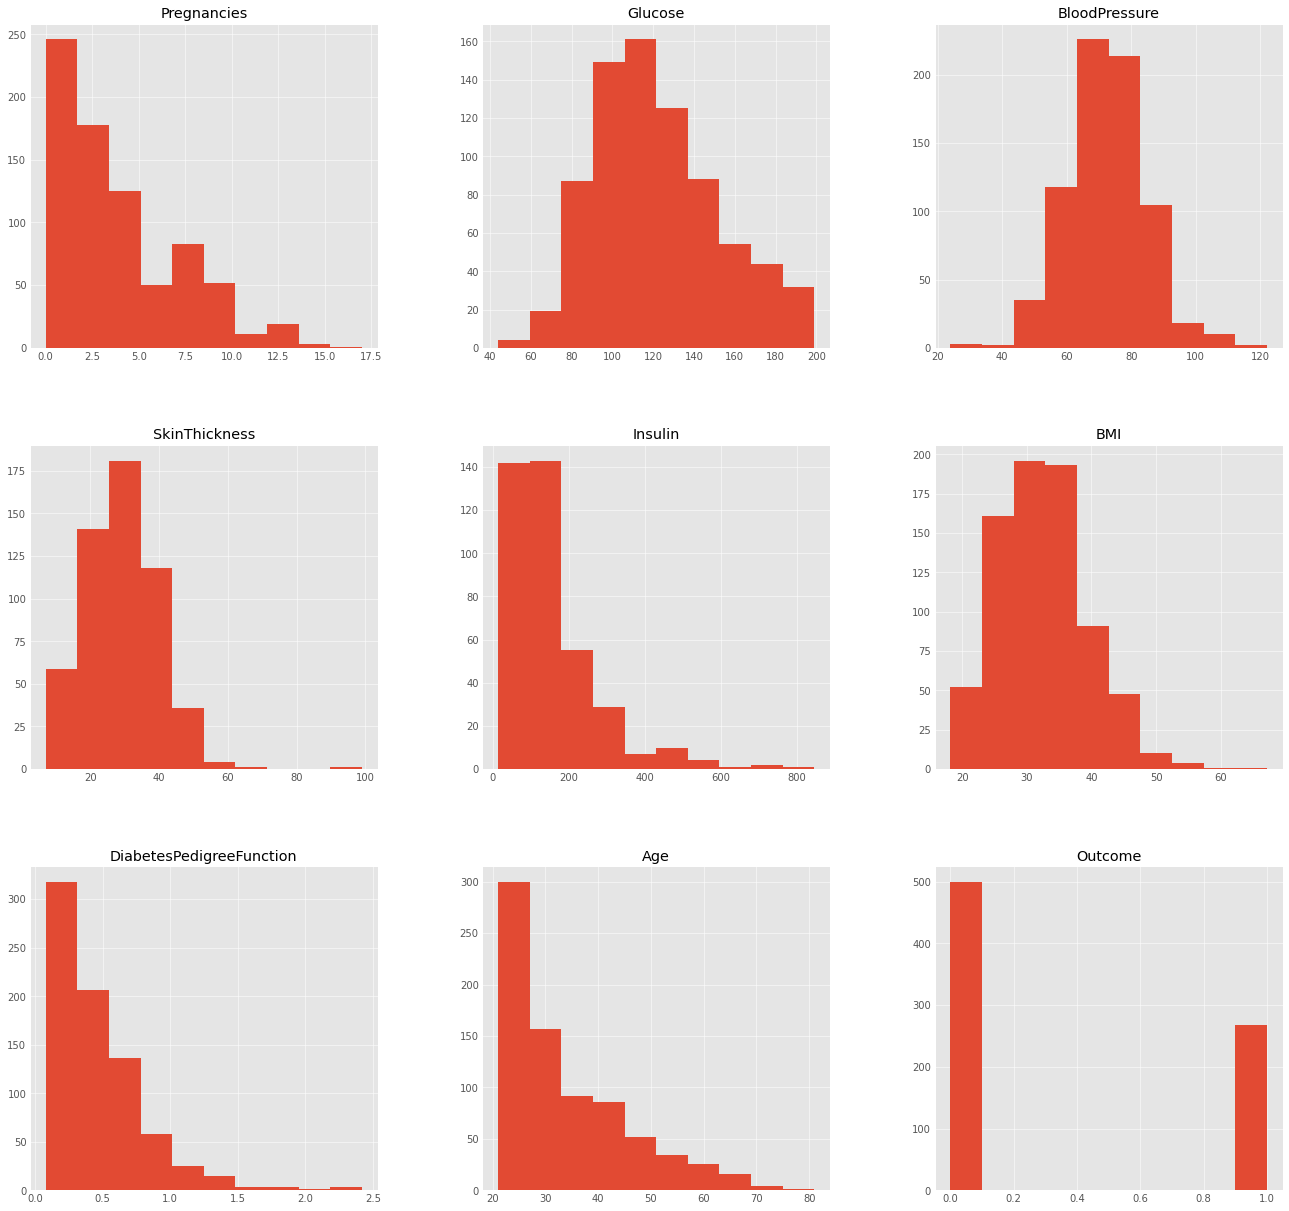

In [42]:
df.hist(figsize = (20,20))

In [43]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])